[1 0 1 ... 1 0 0]
[1, 4, 6, 7, 9, 10, 12, 14, 17, 18, 19, 28, 34, 38, 41, 48, 50, 51, 52, 53, 54, 56, 57, 61, 62, 64, 65, 74, 77, 78, 81, 84, 85, 86, 87, 88, 90, 92, 93, 95, 96, 99, 104, 105, 107, 111, 114, 116, 117, 121, 126, 127, 128, 129, 130, 132, 137, 140, 141, 152, 170, 173, 174, 176, 177, 178, 179, 181, 184, 186, 192, 193, 195, 196, 198, 199, 206, 209, 219, 226, 227, 228, 230, 233, 234, 237, 238, 244, 245, 246, 247, 250, 253, 257, 258, 260, 261, 269, 272, 278, 280, 281, 283, 285, 288, 293, 296, 297, 298, 302, 306, 307, 320, 323, 331, 332, 334, 335, 337, 341, 344, 345, 347, 354, 360, 362, 368, 369, 381, 382, 383, 384, 385, 388, 389, 390, 394, 400, 401, 402, 403, 406, 408, 409, 410, 416, 419, 420, 423, 440, 445, 446, 448, 450, 452, 459, 461, 467, 468, 469, 475, 480, 481, 484, 485, 487, 489, 490, 493, 499, 500, 501, 506, 507, 512, 514, 516, 517, 520, 522, 524, 533, 537, 540, 546, 547, 550, 551, 553, 554, 555, 556, 557, 560, 563, 567, 569, 570, 575, 578, 579, 582, 583, 592, 599, 605

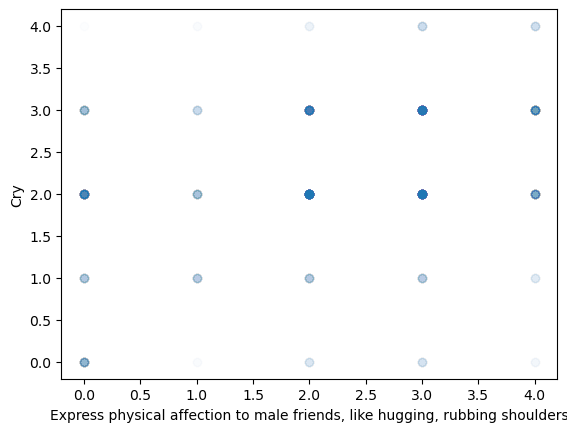

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


inf = pd.read_csv("masculinity.csv")
# print(inf.head())
# print(inf.columns)
cols_to_map = ["q0007_0001", "q0007_0002", "q0007_0003", "q0007_0004", "q0007_0005", "q0007_0006", "q0007_0007", "q0007_0008", "q0007_0009", "q0007_0010", "q0007_0011"]
for col in cols_to_map:
    inf[col] = inf[col].map({"Never, and not open to it" : 0, "Never, but open to it" : 1, "Rarely" : 2, "Sometimes" : 3, "Often" : 4})

clust = inf.dropna(subset = ["q0007_0001", "q0007_0002", "q0007_0003", "q0007_0004", "q0007_0005", "q0007_0006", "q0007_0007", "q0007_0008", "q0007_0009"])
classifier = KMeans(n_clusters = 2)
classifier.fit(clust[["q0007_0001", "q0007_0002", "q0007_0003", "q0007_0004", "q0007_0005", "q0007_0006", "q0007_0007", "q0007_0008", "q0007_0009"]])
print(classifier.labels_)

cluster_zero_indices = []
cluster_one_indices = []
for i in range(len(classifier.labels_)):
    if classifier.labels_[i] == 0:
        cluster_zero_indices.append(i)
    elif classifier.labels_[i] == 1:
        cluster_one_indices.append(i)
        
print(cluster_zero_indices)

print(inf["q0007_0003"].value_counts())

plt.scatter(inf["q0007_0003"], inf["q0007_0004"], alpha = 0.01)
plt.xlabel("Express physical affection to male friends, like hugging, rubbing shoulders")
plt.ylabel("Cry")
plt.show()